# Data Cleaning & Preprocessing Assignment

## Introduction

Data cleaning and preprocessing is a crucial first step in any machine learning workflow. Raw datasets often contain missing values, duplicate records, inconsistent formats, and outliers, which can negatively affect the performance of machine learning models. The goal of this assignment is to transform raw data into a clean, structured, and standardized format suitable for analysis and modeling.

This project focuses on:

- Identifying and handling missing values in both numerical and categorical features
- Removing duplicate entries to ensure data integrity
- Converting categorical features into numerical representations using label encoding or one-hot encoding
- Normalizing and standardizing numerical features to improve comparability
- Detecting and handling outliers interactively based on IQR thresholds
- Visualizing the dataset to understand feature distributions, cardinality, and the impact of cleaning

The Titanic dataset is used as an example in this notebook. The cleaned dataset can then be used for further machine learning tasks such as feature engineering and model building.


## Importing Required Packages

Before we begin the data cleaning and preprocessing steps, we need to import all the necessary libraries. These libraries will help us handle data, perform numerical computations, visualize distributions, and preprocess features for machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler

## Loading and Inspecting the Dataset:
  1. Configure display options to show all the columns
  2. Make a global variable to store the dataset
  3. Make a copy of the dataset, so we can always revert back or compare from the main
  4. Show a sample of it (first 5 rows)

In [2]:
pd.options.display.max_columns = None

In [3]:
DATASET = pd.read_csv("datasets/Titanic-Dataset.csv")

In [4]:
df = DATASET.copy()

In [5]:
print(df.shape)
display(df.head())

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Initial Data Exploration

In this step, we perform an initial exploration of the dataset to understand its structure and quality. This includes:

- Checking data types and general information of each column
- Identifying missing values
- Summarizing numeric and non-numeric data
- Counting unique values per column
- Detecting duplicate rows and dropping them if necessary

If any missing values are found, we will visualize them using appropriate plots to understand their distribution.


In [6]:
dup_count = df.duplicated().sum()

In [7]:
def miss_count(data):
    count = 0
    for i in data.isnull().sum().values:
        if i > 0:
            count+=1
    return count    

In [8]:
def data_explore(data):
    print("\nInformation")
    display(data.info())

    print("\nMissing Values")
    display(data.isnull().sum().sort_values(ascending=False).head(miss_count(data)))

    print('\nNumeric Data Summary')
    display(data.describe(include=[np.number]).T)

    print('\nNon-Numeric Data')
    display(data.describe(include=['object', 'category', 'datetime64[ns]']))

    print('\nUnique Values per Column')
    display(data.nunique().sort_values(ascending=True).head(30))

    print(f'\nNumber of Duplicate Values : {dup_count}')
    if dup_count:
        df.drop_duplicates().reset_index(drop=True)

In [9]:
data_explore(df)


Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None


Missing Values


Cabin       687
Age         177
Embarked      2
dtype: int64


Numeric Data Summary


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292



Non-Numeric Data


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,G6,S
freq,1,577,7,4,644



Unique Values per Column


Survived         2
Sex              2
Pclass           3
Embarked         3
Parch            7
SibSp            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64


Number of Duplicate Values : 0


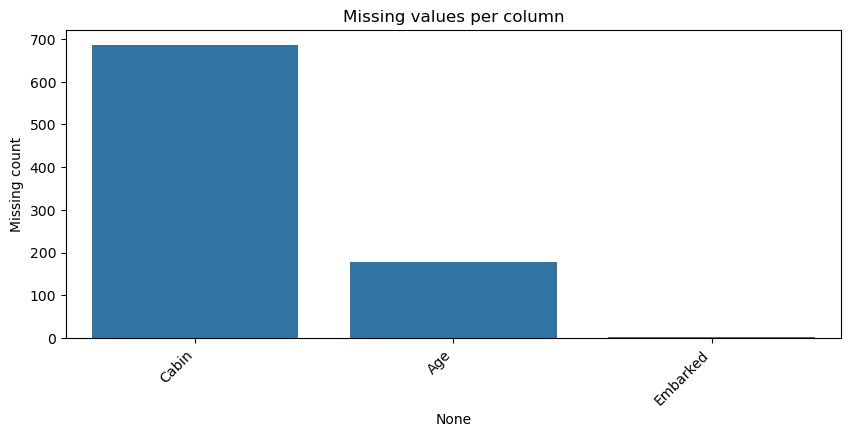

In [10]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
if len(missing):
    plt.figure(figsize=(10,4))
    sns.barplot(x=missing.index, y=missing.values)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Missing count')
    plt.title('Missing values per column')
    plt.show()
else:
    print("No missing values found.")

## Handling Numerical and Categorical Features

In this step, we separate the dataset into numerical, categorical, and date columns. Since date columns are not required for this analysis, we discard them.  

For **numerical columns**, we calculate the percentage of missing values. If the missing value percentage exceeds a predefined threshold, we drop the column from the dataset.  

For **categorical columns**, we calculate the normalized cardinality (percentage of unique values). If this exceeds a threshold, we ask the user interactively whether to drop the column. Columns below the threshold are retained automatically.  

This process ensures that we handle features with too many missing values or overly high cardinality, which could negatively impact downstream analysis and modeling.


In [11]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['category','object']).columns.tolist()
date_cols = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

In [12]:
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
print("Missing percentage per column:")
print(missing_pct)

threshold = 50 
cols_to_drop = missing_pct[missing_pct > threshold].index

if len(cols_to_drop) > 0:
    print(f"\nThe following columns have more than {threshold}% missing values:")
    print(list(cols_to_drop))
    user_choice = input(f"Do you want to drop these columns? (y/n): ").strip().lower()
    
    if user_choice == "y":
        df.drop(columns=cols_to_drop, inplace=True)
        print(f"Dropped columns: {list(cols_to_drop)}")
    else:
        print("Skipping column drop as per user choice.")
else:
    print(f"No columns found with more than {threshold}% missing values.")

Missing percentage per column:
Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64

The following columns have more than 50% missing values:
['Cabin']


Do you want to drop these columns? (y/n):  y


Dropped columns: ['Cabin']


In [13]:
# 1. Select non-numeric columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
total_rows = len(df)
cardinality_thresh = 50  # percentage of total rows

# 2. Iterate over each column
for col in cat_cols:
    cardinality_pct = (df[col].nunique() / total_rows) * 100
    
    # Check if it exceeds threshold
    if cardinality_pct > cardinality_thresh:
        print(f"\nColumn: '{col}' - Unique values: {df[col].nunique()} ({cardinality_pct:.1f}%) exceeds threshold of {cardinality_thresh}%")
        
        # Ask user interactively
        while True:
            choice = input(f"Do you want to drop the column '{col}'? (y/n): ").strip().lower()
            if choice in ['y', 'n']:
                break
            else:
                print("Please type 'y' or 'n'.")
        
        if choice == 'y':
            df.drop(columns=[col], inplace=True)
            print(f"Column '{col}' dropped. New shape: {df.shape}")
        else:
            print(f"Column '{col}' retained.")
    else:
        # Column under threshold, skip
        print(f"\nColumn: '{col}' - Unique values: {df[col].nunique()} ({cardinality_pct:.1f}%) is under threshold. Skipping.")



Column: 'Name' - Unique values: 891 (100.0%) exceeds threshold of 50%


Do you want to drop the column 'Name'? (y/n):  y


Column 'Name' dropped. New shape: (891, 10)

Column: 'Sex' - Unique values: 2 (0.2%) is under threshold. Skipping.

Column: 'Ticket' - Unique values: 681 (76.4%) exceeds threshold of 50%


Do you want to drop the column 'Ticket'? (y/n):  y


Column 'Ticket' dropped. New shape: (891, 9)

Column: 'Embarked' - Unique values: 3 (0.3%) is under threshold. Skipping.


## Missing Value Imputation

After identifying columns with missing values, we impute them to ensure a complete dataset for further analysis.  

- For **numerical columns**, missing values are filled with the **median** of the respective column by default. Users can replace `.median()` with `.mean()` or any other method if they prefer.  
- For **categorical columns**, missing values are filled with the **mode** (most frequent value) of the column.

This step helps maintain data integrity and prepares the dataset for encoding and scaling.


In [14]:
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

In [15]:
cat_cols = df.select_dtypes(include=['category','object']).columns.tolist()
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

In [16]:
print(f"\nMissing values after imputation: {df.isnull().sum().sum()}")


Missing values after imputation: 0


## Encoding Categorical Features

After handling missing values, we convert categorical columns into numerical representations suitable for machine learning models.  

- For each categorical column, we first check its **cardinality** (number of unique values) relative to the total rows.  
  - **High cardinality** (>50% of rows unique): Skipping the column is recommended to avoid creating too many new features.  
  - **Binary columns** (2 unique values): Label Encoding is recommended.  
  - **Few categories** (≤10 unique values): One-Hot Encoding is recommended.  
  - Columns with moderate cardinality: Label Encoding is suggested to prevent an explosion of columns.  

- The user is prompted to **choose the encoding method** for each column:
  - **One-Hot Encoding** (`o`)
  - **Label Encoding** (`l`)
  - **Skip column** (`s`)

This interactive approach allows flexibility in handling categorical variables based on cardinality and the specific dataset characteristics.


In [17]:
label_encoders = {}

print('Sample')
display(df.head())

total_rows = len(df)
print("Categorical columns detected:", cat_cols)

for col in cat_cols:
    n_unique = df[col].nunique()
    unique_pct = n_unique / total_rows * 100

    if unique_pct > 50:
        suggestion_text = f"High cardinality ({n_unique} unique values, {unique_pct:.1f}% of rows). Skip recommended."
    elif n_unique == 2:
        suggestion_text = f"Binary column ({n_unique} unique values). Label Encoding recommended."
    elif n_unique <= 10:
        suggestion_text = f"Few categories ({n_unique} unique values). One-Hot Encoding recommended."
    else:
        suggestion_text = f"{n_unique} unique values. Label Encoding recommended to avoid too many columns."

    print(f"\nColumn '{col}': {suggestion_text}")

    while True:
        choice = input(f"Choose encoding for '{col}' - One-Hot (o), Label (l), Skip (s): ").strip().lower()
        if choice in ['o', 'l', 's']:
            break
        else:
            print("Invalid input. Please type 'o', 'l', or 's'.")

    if choice == 'o':
        df = pd.get_dummies(df, columns=[col], prefix=col)
        print(f"Applied One-Hot Encoding to '{col}'.")

    elif choice == 'l':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
        print(f"Applied Label Encoding to '{col}'.")

    elif choice == 's':
        print(f"Skipped column '{col}'.")


Sample


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


Categorical columns detected: ['Sex', 'Embarked']

Column 'Sex': Binary column (2 unique values). Label Encoding recommended.


Choose encoding for 'Sex' - One-Hot (o), Label (l), Skip (s):  k


Invalid input. Please type 'o', 'l', or 's'.


Choose encoding for 'Sex' - One-Hot (o), Label (l), Skip (s):  l


Applied Label Encoding to 'Sex'.

Column 'Embarked': Few categories (3 unique values). One-Hot Encoding recommended.


Choose encoding for 'Embarked' - One-Hot (o), Label (l), Skip (s):  o


Applied One-Hot Encoding to 'Embarked'.


## Scaling Numeric Features

After cleaning and preprocessing, numeric features may need **scaling** to improve comparability and prepare for machine learning algorithms.

For each numeric column:

1. The user is prompted to choose a scaling method:
   - **Standardization (s)**: Transforms the column to have **mean 0 and standard deviation 1**.
   - **Normalization (n)**: Scales the values to a **0–1 range** using Min-Max scaling.
   - **Skip (k)**: Leaves the column unchanged.

2. The chosen scaler is applied to the column, and the scaler object is stored in case **inverse transformation** is needed later.

This step ensures all numeric features are on a comparable scale, which is particularly important for algorithms sensitive to feature magnitudes, such as gradient descent-based models or distance-based models.


In [18]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns detected:", num_cols)

standard_scalers = {}
minmax_scalers = {}

for col in num_cols:
    while True:
        choice = input(f"\nColumn '{col}': Choose scaling - Standardize (s), Normalize (n), Skip (k): ").strip().lower()
        if choice in ['s', 'n', 'k']:
            break
        else:
            print("Invalid input. Please type 's', 'n', or 'k'.")

    if choice == 's':
        scaler = StandardScaler()
        df[col] = scaler.fit_transform(df[[col]])
        standard_scalers[col] = scaler  # save scaler if inverse transform needed
        print(f"Standardized column '{col}'.")

    elif choice == 'n':
        scaler = MinMaxScaler()
        df[col] = scaler.fit_transform(df[[col]])
        minmax_scalers[col] = scaler  # save scaler if inverse transform needed
        print(f"Normalized column '{col}'.")

    elif choice == 'k':
        print(f"Skipped column '{col}'.")


Numeric columns detected: ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']



Column 'PassengerId': Choose scaling - Standardize (s), Normalize (n), Skip (k):  k


Skipped column 'PassengerId'.



Column 'Survived': Choose scaling - Standardize (s), Normalize (n), Skip (k):  k


Skipped column 'Survived'.



Column 'Pclass': Choose scaling - Standardize (s), Normalize (n), Skip (k):  k


Skipped column 'Pclass'.



Column 'Sex': Choose scaling - Standardize (s), Normalize (n), Skip (k):  k


Skipped column 'Sex'.



Column 'Age': Choose scaling - Standardize (s), Normalize (n), Skip (k):  n


Normalized column 'Age'.



Column 'SibSp': Choose scaling - Standardize (s), Normalize (n), Skip (k):  k


Skipped column 'SibSp'.



Column 'Parch': Choose scaling - Standardize (s), Normalize (n), Skip (k):  k


Skipped column 'Parch'.



Column 'Fare': Choose scaling - Standardize (s), Normalize (n), Skip (k):  s


Standardized column 'Fare'.


## Calculating Normalized Cardinality for Numeric Columns

In this step, we calculate the **normalized cardinality** for each numeric column.  

- Normalized cardinality represents the **percentage of unique values relative to the total number of rows** in the dataset.  
- This metric helps identify columns with very high uniqueness, which may influence decisions during outlier handling or feature selection.  

The result is stored in a dictionary where the **key** is the column name and the **value** is its normalized cardinality percentage. A quick check is performed by printing the dictionary to see the cardinality of each numeric column.

## Visualizing Normalized Cardinality of Numeric Columns

To better understand the uniqueness of numeric features, we plot their **normalized cardinality**:

- The **x-axis** represents the numeric columns.
- The **y-axis** shows the normalized cardinality as a percentage of unique values relative to the total number of rows.
- Each point on the line chart represents a column, with its exact percentage labeled above the marker.

This visualization helps identify columns with very high or very low uniqueness, which can inform decisions on outlier handling or feature selection.


In [19]:
cardinality_dict = {col: (df[col].nunique() / total_rows) * 100 for col in num_cols}

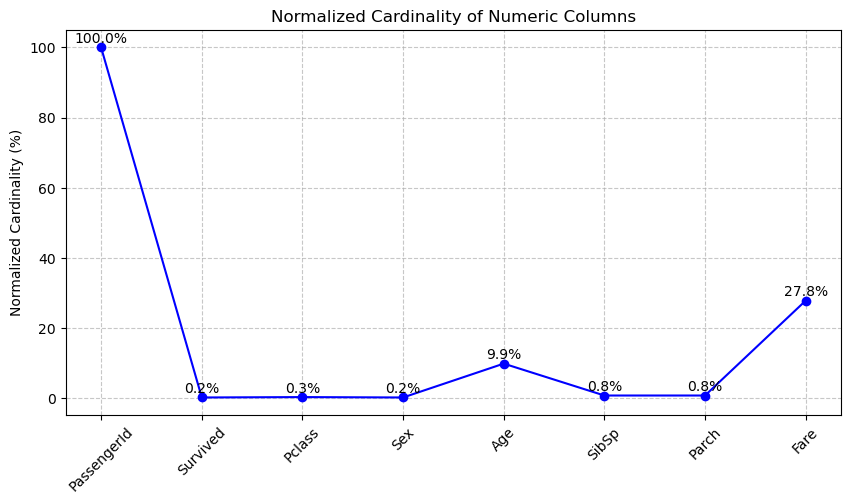

In [20]:
cols = list(cardinality_dict.keys())
cardinality_pct = list(cardinality_dict.values())

plt.figure(figsize=(10, 5))
plt.plot(cols, cardinality_pct, marker='o', linestyle='-', color='b')

for i, val in enumerate(cardinality_pct):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center', va='bottom')

plt.xticks(rotation=45)
plt.ylabel('Normalized Cardinality (%)')
plt.title('Normalized Cardinality of Numeric Columns')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


## Interactive Column Review and Removal

In this step, we perform an **interactive review of all columns** to decide if any should be dropped based on outlier percentage and normalized cardinality:

- For **numeric columns**:
  - We calculate the **outlier percentage** using the IQR method.
  - Columns are prompted for removal if the outlier percentage **exceeds a threshold** or if the normalized cardinality **exceeds a threshold**.
  
- For **categorical columns**:
  - Only columns with normalized cardinality exceeding the threshold are prompted for removal.

For each column, the following statistics are displayed:

- Outlier percentage (for numeric columns)
- Normalized cardinality (% of unique values)

The user is then prompted to decide whether to **drop the column** or retain it. Columns that meet all conditions are skipped automatically.

This step ensures that features with excessive outliers or overly high cardinality can be removed, improving dataset quality for downstream analysis.


In [21]:
def handle_column_interactive_inplace(df, columns, cardinality_dict, threshold_pct=20, cardinality_thresh=50, num_cols=None):
    """
    Interactive column removal (in-place):
    - For numeric columns: prompts if outlier percentage exceeds threshold or cardinality exceeds threshold.
    - For categorical columns: prompts only if cardinality exceeds threshold.
    - Displays stats for all columns, but only prompts when condition fails.
    """
    total_rows = len(df)
    
    if num_cols is None:
        num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    for col in columns:
        normalized_cardinality = cardinality_dict.get(col, 0)
        outlier_pct = None
        condition_fails = False
        
        if col in num_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
            outlier_pct = (outlier_count / total_rows) * 100
            
            if outlier_pct > threshold_pct or normalized_cardinality > cardinality_thresh:
                condition_fails = True
        else:
            if normalized_cardinality > cardinality_thresh:
                condition_fails = True

        print(f"\nColumn: '{col}':")
        if outlier_pct is not None:
            print(f"Outlier percentage is {outlier_pct:.1f}% (threshold {threshold_pct}%).")
        else:
            print(f"Outlier percentage is N/A (categorical column).")
        print(f"Normalized cardinality is {normalized_cardinality:.1f}% (threshold {cardinality_thresh}%).")

        if condition_fails:
            while True:
                choice = input(f"Do you want to drop the column '{col}'? (y/n): ").strip().lower()
                if choice in ['y', 'n']:
                    break
                else:
                    print("Please type 'y' or 'n'.")
            
            if choice == 'y':
                df.drop(columns=[col], inplace=True)
                print(f"Column '{col}' dropped. New shape: {df.shape}")
            else:
                print(f"Column '{col}' retained.")
        else:
            print(f"Column '{col}' is fine. Skipping without prompt.")


handle_column_interactive_inplace(df, df.columns.tolist(), cardinality_dict,
                                  threshold_pct=20, cardinality_thresh=50, num_cols=num_cols)



Column: 'PassengerId':
Outlier percentage is 0.0% (threshold 20%).
Normalized cardinality is 100.0% (threshold 50%).


Do you want to drop the column 'PassengerId'? (y/n):  y


Column 'PassengerId' dropped. New shape: (891, 10)

Column: 'Survived':
Outlier percentage is 0.0% (threshold 20%).
Normalized cardinality is 0.2% (threshold 50%).
Column 'Survived' is fine. Skipping without prompt.

Column: 'Pclass':
Outlier percentage is 0.0% (threshold 20%).
Normalized cardinality is 0.3% (threshold 50%).
Column 'Pclass' is fine. Skipping without prompt.

Column: 'Sex':
Outlier percentage is 0.0% (threshold 20%).
Normalized cardinality is 0.2% (threshold 50%).
Column 'Sex' is fine. Skipping without prompt.

Column: 'Age':
Outlier percentage is 7.4% (threshold 20%).
Normalized cardinality is 9.9% (threshold 50%).
Column 'Age' is fine. Skipping without prompt.

Column: 'SibSp':
Outlier percentage is 5.2% (threshold 20%).
Normalized cardinality is 0.8% (threshold 50%).
Column 'SibSp' is fine. Skipping without prompt.

Column: 'Parch':
Outlier percentage is 23.9% (threshold 20%).
Normalized cardinality is 0.8% (threshold 50%).


Do you want to drop the column 'Parch'? (y/n):  y


Column 'Parch' dropped. New shape: (891, 9)

Column: 'Fare':
Outlier percentage is 13.0% (threshold 20%).
Normalized cardinality is 27.8% (threshold 50%).
Column 'Fare' is fine. Skipping without prompt.

Column: 'Embarked_C':
Outlier percentage is N/A (categorical column).
Normalized cardinality is 0.0% (threshold 50%).
Column 'Embarked_C' is fine. Skipping without prompt.

Column: 'Embarked_Q':
Outlier percentage is N/A (categorical column).
Normalized cardinality is 0.0% (threshold 50%).
Column 'Embarked_Q' is fine. Skipping without prompt.

Column: 'Embarked_S':
Outlier percentage is N/A (categorical column).
Normalized cardinality is 0.0% (threshold 50%).
Column 'Embarked_S' is fine. Skipping without prompt.


## Comparing Numeric Feature Signatures Before and After Preprocessing

In this step, we compare the **numeric features of the original dataset** with the **cleaned dataset** to visualize the impact of preprocessing:

1. Identify numeric columns in both the **original dataset** (`DATASET`) and the **cleaned dataset** (`df`).
2. Determine which numeric columns have **changed** during preprocessing.
3. **Normalize** the values of the changed numeric features using Min-Max scaling to bring them to a common range for comparison.
4. Plot **density curves** (signatures) of the normalized features:
   - Dashed lines represent the original dataset.
   - Solid lines represent the cleaned dataset.

This visualization allows us to see how cleaning and preprocessing steps—such as outlier removal, missing value imputation, or scaling—have affected the distribution of numeric features.


Columns before preprocessing: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Columns after preprocessing: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare']
Numeric columns that changed during preprocessing: ['Age', 'Fare']


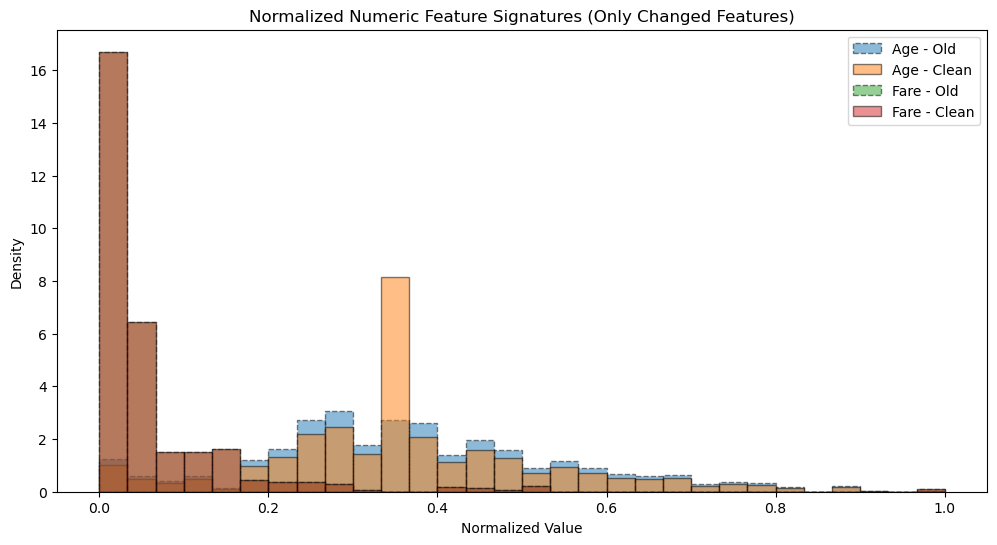

In [22]:
numeric_old = DATASET.select_dtypes(include=[float, int]).columns.tolist()
numeric_new = df.select_dtypes(include=[float, int]).columns.tolist()

common_numeric = list(set(numeric_old) & set(numeric_new))

changed_numeric = [col for col in common_numeric 
                   if not DATASET[col].equals(df[col])]

print("Columns before preprocessing:", numeric_old)
print("Columns after preprocessing:", numeric_new)
print("Numeric columns that changed during preprocessing:", changed_numeric)

scaler = MinMaxScaler()

DATASET_norm = DATASET[changed_numeric].copy()
DATASET_norm[changed_numeric] = scaler.fit_transform(DATASET[changed_numeric])

df_norm = df[changed_numeric].copy()
df_norm[changed_numeric] = scaler.fit_transform(df[changed_numeric])

plt.figure(figsize=(12, 6))

for col in changed_numeric:
    plt.hist(DATASET_norm[col], bins=30, density=True, alpha=0.5, linestyle='--', edgecolor='black', label=f'{col} - Old')
    plt.hist(df_norm[col], bins=30, density=True, alpha=0.5, linestyle='-', edgecolor='black', label=f'{col} - Clean')

plt.title("Normalized Numeric Feature Signatures (Only Changed Features)")
plt.xlabel("Normalized Value")
plt.ylabel("Density")
plt.legend()
plt.show()

## Saving the dataset
finally, we can save the dataset in the 'datasets' folder

In [23]:
save_path = "datasets/Titanic-Preprocessed.csv"
pd.to_csv(save_path)

AttributeError: module 'pandas' has no attribute 'to_csv'